# Two Parent Population
## Third try
### 99/10/02
For a different sex ratio looking for variation in $\lambda_c$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Sex ratio is the ratio of male to female population and in our assumptions it is constant along time. In reality male infants are more commun and also it is more probable to die early for him. Overall this is the sex ratio it has been assumed for adault population. 

In [52]:
sex_ratio = 150/200

#first generation population is assumed to be two, equally one couple.
n_f = 1
n_m = 1

We are counting couples assuming every single person is going to join with a person of the opposite sex if there exist any. Moreover it is assumed that they marry once and with one person.

In [4]:
#calculating female and male population 
#using poisson distribution and for a given female and male population for an aritrary sex ratio 
def next_gen(n_f, n_m, sex_ratio, lam):
    n_couples = np.min([n_f, n_m])
    
    #new generation
    n_f = 0
    n_m = 0
    for i in range(n_couples):
        inf_num = np.random.poisson(lam, 1)
        for j in range(int(inf_num)):
            if random.random() > sex_ratio:
                n_f = n_f + 1
            else:
                n_m = n_m + 1
    
    return int(n_f), int(n_m) 

Wall time: 2.09 s


Text(0.5, 1.0, 'Population Dynamics\n Female-Male')

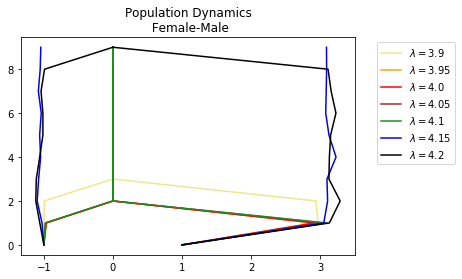

In [9]:
%%time

x = 10
time = np.arange(x)
lam_mat = np.arange(3.9, 4.2, 0.05)

color = ['khaki','orange', 'red', 'brown', 'forestgreen', 'blue', 'black', 'gray', 'purple', 'green', 'lawngreen', 'pink' ]

for lam in lam_mat:
    pop = np.zeros((x, 2))
    pop[0, 0] = n_f
    pop[0, 1] = n_m

    ave = 1000
    pop_1run  = np.zeros((ave, 2))

    for t in range(x-1):
        for i in range(ave):
            pop_1run[i, 0], pop_1run[i, 1] = next_gen(int(pop[t, 0]), int(pop[t, 1]), sex_ratio, lam)
        pop[t + 1, 0], pop[t + 1, 1] = np.mean(pop_1run[:, 0]), np.mean(pop_1run[:, 1])
    
    index = int(np.where(np.isclose(lam_mat, lam))[0])
    plt.plot(-pop[:, 0], time, c = color[index], label = f'$\lambda = {np.round(lam, 2)}$') #female
    plt.plot( pop[:, 1], time, c = color[index])   #male

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Population Dynamics\n Female-Male")
# plt.savefig("popdyn.png")

Wall time: 53.9 s


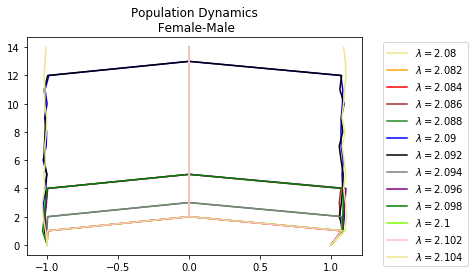

In [25]:
%%time

x = 15
time = np.arange(x)
lam_mat = np.arange(2.08, 2.104, 0.002)

color = ['khaki','orange', 'red', 'brown', 'forestgreen', 'blue', 'black', 'gray', 'purple', 'green', 'lawngreen', 'pink']

for lam in lam_mat:
    pop = np.zeros((x, 2))
    pop[0, 0] = n_f
    pop[0, 1] = n_m

    ave = 10000
    pop_1run  = np.zeros((ave, 2))

    for t in range(x-1):
        for i in range(ave):
            pop_1run[i, 0], pop_1run[i, 1] = next_gen(int(pop[t, 0]), int(pop[t, 1]), sex_ratio, lam)
        pop[t + 1, 0], pop[t + 1, 1] = np.mean(pop_1run[:, 0]), np.mean(pop_1run[:, 1])
    
    index = int(np.where(np.isclose(lam_mat, lam))[0])%np.size(color)
    plt.plot(-pop[:, 0], time, c = color[index], label = f'$\lambda = {np.round(lam, 4)}$') #female
    plt.plot( pop[:, 1], time, c = color[index])   #male

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Population Dynamics\n Female-Male")
plt.savefig("popdyn3.png")

### critical value
Loking for the critical value of $\lambda$.

In [55]:
#does it extinc?

def extinc(nf_0, nm_0, lam):
    pop  = [[nf_0, nm_0]]
    pop_0 = nf_0 + nm_0
    time = []
    i = 0
    while 1:
        n_f, n_m = next_gen(pop[i][0], pop[i][1],sex_ratio , lam)
        pop = np.vstack((pop, [n_f, n_m]))
        i += 1
        pop_i = n_f + n_m
        if pop_i < 0.05 * pop_0 or np.max([n_f, n_m]) == 0:
            return 1
        if pop_i > 5 * pop_0:
            return 0

In [11]:
#probability of extinction

def ext_prob(nf_0, nm_0, lam):
    samples = 1000
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(nf_0, nm_0, lam)

    extinction_probability = extinctions / samples

    return extinction_probability

For different initial populations:

[0.132 0.145 0.165 0.173 0.141 0.17  0.169 0.151 0.169 0.185 0.186 0.192
 0.179 0.193 0.182 0.186 0.188 0.187 0.19  0.194 0.195 0.219 0.188 0.223
 0.204 0.229 0.206 0.204 0.2   0.208 0.215 0.206 0.216 0.235 0.22 ]
[0.046 0.065 0.057 0.082 0.092 0.096 0.12  0.104 0.116 0.128 0.143 0.162
 0.158 0.174 0.168 0.221 0.198 0.231 0.244 0.229 0.273 0.294 0.297 0.317
 0.318 0.359 0.341 0.356 0.373 0.421 0.437 0.441 0.482 0.505 0.524]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.001 0.    0.002 0.006 0.01  0.019 0.036 0.058 0.135
 0.264 0.377 0.535 0.655 0.789 0.859 0.929 0.95  0.974 0.979 0.993]
Wall time: 25min 32s


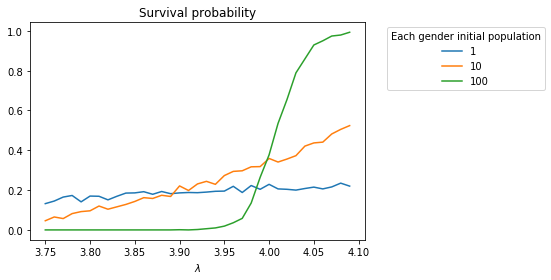

In [56]:
%%time

sex_ratio = 150/200

lam_mat     = np.arange(3.75, 4.1, 0.01)
probability = np.zeros(np.size(lam_mat)) 

initial_pop = [[1, 1], [10, 10], [100, 100]]

for j in range(np.shape(initial_pop)[0]):
    nf_0 = initial_pop[j][0]
    nm_0 = initial_pop[j][1]

    for i in range(np.size(lam_mat)):
        probability[i] = ext_prob(nf_0, nm_0, lam_mat[i])


    plt.plot(lam_mat, 1-probability, label = f'{initial_pop[j][0]}')
    
    print((1-probability))
    
plt.title("Survival probability")
plt.xlabel("$\lambda$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Each gender initial population')

In [ ]:
%%time

sex_ratio = 150/200
lam_mat     = np.arange(4, 4.06, 0.003)
probability = np.zeros(np.size(lam_mat)) 

nf_0 = 300
nm_0 = 300

for i in range(np.size(lam_mat)):
    probability[i] = ext_prob(nf_0, nm_0, lam_mat[i])
    
    
plt.plot(lam_mat, 1-probability, c = 'orange')
plt.title("Survival probability")
plt.xlabel("$\lambda$")


In [60]:
print((1-probability[26:]), '\n', lam_mat[26:], np.size(lam_mat))

[0.535 0.655 0.789 0.859 0.929 0.95  0.974 0.979 0.993] 
 [4.01 4.02 4.03 4.04 4.05 4.06 4.07 4.08 4.09] 35


So we ar going to assume $\lambda_c = 2.07$ and then fitting the critical exponent.

λ_c =  4


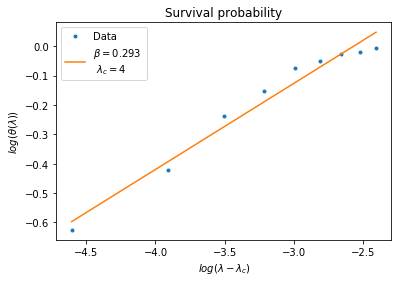

In [61]:
lam_c = 4
fit = np.polyfit(np.log(lam_mat[26:]-lam_c), np.log(1-probability[26:]), 1)

print("\u03BB_c = ", lam_c)

plt.plot(np.log(lam_mat[26:]-lam_c), np.log(1-probability[26:]), '.', label = 'Data')
plt.plot(np.log(lam_mat[26:]-lam_c), fit[0] * np.log(lam_mat[26:] - lam_c) + fit[1], 
         label = f'$\u03B2={np.round(fit[0], 3)}$ \n $\u03BB_c = {lam_c}$')

plt.title("Survival probability")
plt.ylabel("$log(\u03B8 (\lambda))$")
plt.xlabel("$log(\lambda - \lambda_c)$")

plt.legend()

# plt.savefig("1exptp02.png")

### Mean size
We are looking for cumulative population and it is finite for $\lambda$s which extinct and infinite for which don't for sure.


In [24]:
def final_cumulative_population(lam):
    total_population = 0
    pop  = [[1, 1]]
    i = 0
    while pop[i][0] > 0 and pop[i][1] > 0:
        n_f, n_m = next_gen(pop[i][0], pop[i][1],sex_ratio , lam)
        pop = np.vstack((pop, [n_f, n_m]))
        total_population += (n_f + n_m)
        i += 1
    return total_population

Wall time: 35.8 s


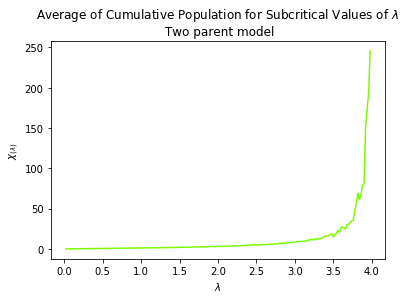

In [37]:
%%time


lam_mat = np.arange(0.02, 4, 0.02)
cum_pop = []
 

for lam in lam_mat:
    ave = 1000
    cum_pop_1run = np.zeros(ave)
    for m in range(ave):
        cum_pop_1run[m] = final_cumulative_population(lam)
    cum_pop.append(np.mean(cum_pop_1run[:]))
    
    
plt.plot(lam_mat, cum_pop, c = 'lawngreen')
plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$ \n Two parent model")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")


plt.savefig("2exptp01-2.png")

[-1.54671135  1.74551017]


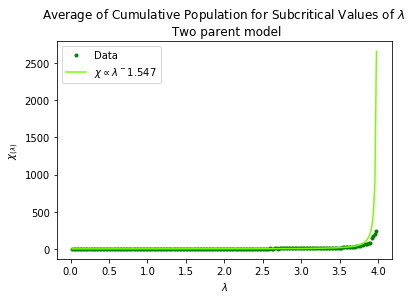

In [38]:
lam_c = 4

fit2 = np.polyfit(np.log(np.abs(lam_mat-lam_c)), np.log(cum_pop), 1)
print(fit2)

plt.plot(lam_mat, cum_pop, '.', c = 'green', label = 'Data')
plt.plot(lam_mat, np.e ** (fit21[0] * np.log(np.abs(lam_mat-lam_c)) + fit21[1]), 
         c = 'lawngreen', label = f'$\chi \propto \u03BB^{np.round(fit2[0], 3)}$')

plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$ \n Two parent model")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")
# plt.xlim(0, 1.2)
plt.legend()

# plt.savefig("2exptp02.png")

### $P_k(\lambda)$ 
One can ask for the probability $P_k(\lambda)$ that the number of descendants is at least k.

In [39]:
def population(lam, generation):
    n_f, n_m = 1, 1
    survival = np.zeros(generation)
    survival[0] = 1
    for t in range(generation):
        n_f, n_m = next_gen(n_f, n_m,sex_ratio , lam)
        new_pop = n_f + n_m

        if t < generation-1 and new_pop > 0:
            survival[t+1] = 1
        else:
            break
    return survival

Wall time: 834 ms


Text(0.5, 0, 'k')

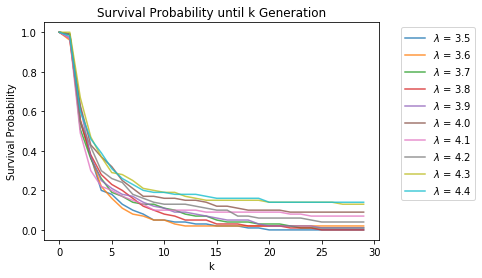

In [42]:
%%time

generation = 30
samples    = 100


lam_mat = np.arange(3.5, 4.5, 0.1)

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(lam, generation)
    survival_probability = survival / samples
    plt.plot(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

# plt.savefig("Survival Probability two parent.png")

Wall time: 35.3 s


Text(0.5, 0, 'k')

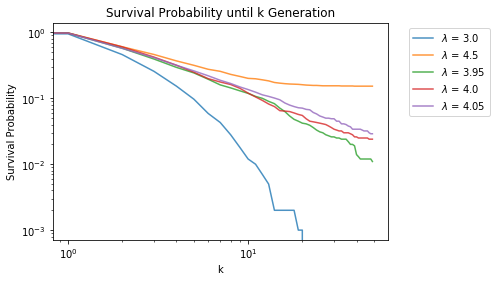

In [44]:
%%time

generation = 50
samples    = 1000


lam_mat = np.append([3, 4.5], np.arange(3.95, 4.1, 0.05))

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(lam, generation)
    survival_probability = survival / samples
    plt.loglog(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

[0.2048 0.1773 0.1534 0.1348 0.1209 0.1084 0.0986 0.0905 0.0844 0.079
 0.0737 0.0699 0.0666 0.063  0.0595 0.0567 0.0537 0.0509 0.0483 0.0463
 0.0448 0.0437 0.0424 0.0406 0.0395 0.0383 0.0366 0.0358 0.0346 0.033
 0.0323 0.031  0.0304 0.0299 0.0293 0.0287 0.0279 0.0273 0.027  0.0266
 0.0257 0.0251 0.0245 0.0238 0.0233 0.0227 0.0224 0.0215 0.0209 0.0206
 0.0203 0.0197 0.0194 0.0187 0.0184 0.0178 0.0176 0.0175 0.0172 0.0169
 0.0168 0.0163 0.0159 0.0154 0.0153 0.015  0.0148 0.0148 0.0147 0.0146
 0.0142 0.0142 0.0139 0.0138 0.0137 0.0137 0.0134 0.0132 0.013  0.0128
 0.0125 0.0123 0.0121 0.0121 0.0121 0.0119 0.0117 0.0116 0.0116 0.0114
 0.0111 0.0109 0.0106 0.0106]
Wall time: 14 s


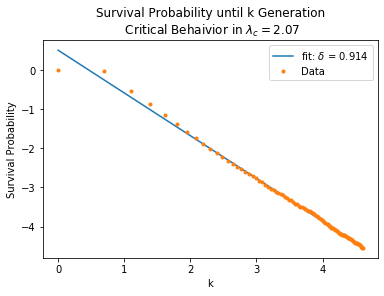

In [48]:
%%time

generation = 100
samples    = 10000

survival = np.zeros(generation)

for lam in [4]:
    survival = 0
    for s in range(samples):
        survival += population(lam, generation)
    survival_probability = survival / samples
    print(survival_probability[6:])

    k    = np.log(np.arange(generation)+1)
    size = np.size(survival_probability[survival_probability>0])
    fit3 = np.polyfit(k[0:size], np.log(survival_probability[0:size]), 1)
    delta = -1/fit3[0]
    Q = plt.plot(k, fit3[0] * k + fit3[1], label = f'fit: $\delta$ = {np.round(delta, 3)}')
    plt.plot(k, np.log(survival_probability), '.', label = 'Data')

    plt.legend()

    plt.title("Survival Probability until k Generation\n Critical Behaivior in $\lambda_c = 2.07$")
    plt.ylabel("Survival Probability")
    plt.xlabel("k")